In [ ]:
!pip install tensorflow -q
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [ ]:
import os
os.listdir()
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('drive/MyDrive/Colab Notebooks/datasets_alfa/data_final_target.csv')

Mounted at /content/drive


In [ ]:
df.head()

,clientId,organizationId,segment,role,currentMethod,common_signatures_mobile,common_signatures_web,special_signatures_mobile,special_signatures_web,claims,mobileApp,organizations,availableMethods,target
0,client_89,org_client_89_8,Крупный бизнес,Сотрудник,SMS,9,9,1,0,1,True,15,SMS,PayControl
1,client_99,org_client_99_1,Малый бизнес,Сотрудник,SMS,12,6,3,1,1,True,1,SMS,КЭП в приложении
2,client_100,org_client_100_1,Малый бизнес,Сотрудник,SMS,9,15,0,2,0,True,1,SMS,PayControl
3,client_344,org_client_344_4,Крупный бизнес,Сотрудник,SMS,10,10,0,5,2,True,17,SMS,PayControl
4,client_126,org_client_126_18,Малый бизнес,Сотрудник,PayControl,5,13,5,0,0,True,14,SMS,КЭП в приложении


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   clientId                   10000 non-null  object
 1   organizationId             10000 non-null  object
 2   segment                    10000 non-null  object
 3   role                       10000 non-null  object
 4   currentMethod              10000 non-null  object
 5   common_signatures_mobile   10000 non-null  int64 
 6   common_signatures_web      10000 non-null  int64 
 7   special_signatures_mobile  10000 non-null  int64 
 8   special_signatures_web     10000 non-null  int64 
 9   claims                     10000 non-null  int64 
 10  mobileApp                  10000 non-null  bool  
 11  organizations              10000 non-null  int64 
 12  availableMethods           9798 non-null   object
 13  target                     10000 non-null  object
dtypes: bool

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['clientId', 'organizationId', 'segment', 'role', 'currentMethod',
       'availableMethods', 'target'],
      dtype='object')

In [ ]:
num_cols = df.select_dtypes(include=['int64']).columns
num_cols

Index(['common_signatures_mobile', 'common_signatures_web',
       'special_signatures_mobile', 'special_signatures_web', 'claims',
       'organizations'],
      dtype='object')

In [ ]:
lencoder = LabelEncoder()

for i in cat_cols:
  df[i] = lencoder.fit_transform(df[i])

In [ ]:
mnmax = MinMaxScaler()
df[num_cols] = mnmax.fit_transform(df[num_cols])
df[num_cols].head()

,common_signatures_mobile,common_signatures_web,special_signatures_mobile,special_signatures_web,claims,organizations
0,0.45,0.45,0.166667,0.000000,0.2,0.636364
1,0.60,0.30,0.500000,0.166667,0.2,0.000000
2,0.45,0.75,0.000000,0.333333,0.0,0.000000
3,0.50,0.50,0.000000,0.833333,0.4,0.727273
4,0.25,0.65,0.833333,0.000000,0.0,0.590909


In [ ]:
X = df.drop(['target', 'clientId', 'organizationId', 'availableMethods'], axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = np.expand_dims(X_train.values, axis=1)
X_test = np.expand_dims(X_test.values, axis=1)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5092 - loss: 0.9789 - val_accuracy: 0.6469 - val_loss: 0.7428
Epoch 2/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6896 - loss: 0.6754 - val_accuracy: 0.7625 - val_loss: 0.5443
Epoch 3/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7770 - loss: 0.4988 - val_accuracy: 0.8050 - val_loss: 0.4321
Epoch 4/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3955 - val_accuracy: 0.8950 - val_loss: 0.3411
Epoch 5/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9058 - loss: 0.3100 - val_accuracy: 0.9050 - val_loss: 0.2876
Epoch 6/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9138 - loss: 0.2756 - val_accuracy: 0.9025 - val_loss: 0.2642
Epoch 7/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9206 - loss: 0.2485 - val_accuracy: 0.8944 - val_loss: 0.2566
Epoch 8/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9163 - loss: 0.2367 - val_accuracy: 0.9006 - val_

Text(0.5, 1.0, 'Изменение loss функции, и метрики качества')

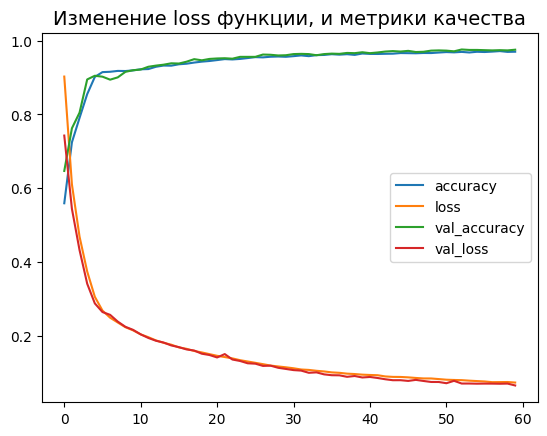

In [ ]:
df2=pd.DataFrame(model.history.history)
df2.plot()
plt.title('Изменение loss функции, и метрики качества', fontsize=14)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Точность на тестовой выборке: {test_acc * 100:.2f}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9680 - loss: 0.0687
Точность на тестовой выборке: 97.40%


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/datasets_alfa/rnn_model.keras')

In [ ]:
!pip install pytorch_tabnet -q

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
X = df.drop(['target', 'clientId', 'organizationId', 'availableMethods'], axis=1).values.astype('float32')
y = df['target'].factorize()[0]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y_train = y_train.astype('int64')
y_test = y_test.astype('int64')


tabnet_model = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=5,
    gamma=1.5,
    n_independent=2,
    n_shared=2,
    lambda_sparse=1e-3,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    verbose=1
)


tabnet_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=65,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128
)


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.11146 | train_accuracy: 0.53038 | valid_accuracy: 0.5205  |  0:00:03s
epoch 1  | loss: 0.60928 | train_accuracy: 0.54562 | valid_accuracy: 0.5415  |  0:00:06s
epoch 2  | loss: 0.46655 | train_accuracy: 0.56088 | valid_accuracy: 0.551   |  0:00:11s
epoch 3  | loss: 0.37194 | train_accuracy: 0.48238 | valid_accuracy: 0.4595  |  0:00:15s
epoch 4  | loss: 0.27484 | train_accuracy: 0.58812 | valid_accuracy: 0.576   |  0:00:18s
epoch 5  | loss: 0.2108  | train_accuracy: 0.60375 | valid_accuracy: 0.597   |  0:00:19s
epoch 6  | loss: 0.17649 | train_accuracy: 0.71512 | valid_accuracy: 0.7115  |  0:00:21s
epoch 7  | loss: 0.15989 | train_accuracy: 0.7385  | valid_accuracy: 0.7315  |  0:00:22s
epoch 8  | loss: 0.15315 | train_accuracy: 0.74588 | valid_accuracy: 0.7435  |  0:00:22s
epoch 9  | loss: 0.13813 | train_accuracy: 0.77538 | valid_accuracy: 0.7725  |  0:00:23s
epoch 10 | loss: 0.13455 | train_accuracy: 0.78675 | valid_accuracy: 0.7845  |  0:00:24s
epoch 11 | loss: 0.13

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
y_pred = tabnet_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность на тестовой выборке: {accuracy * 100:.2f}%')

Точность на тестовой выборке: 98.50%


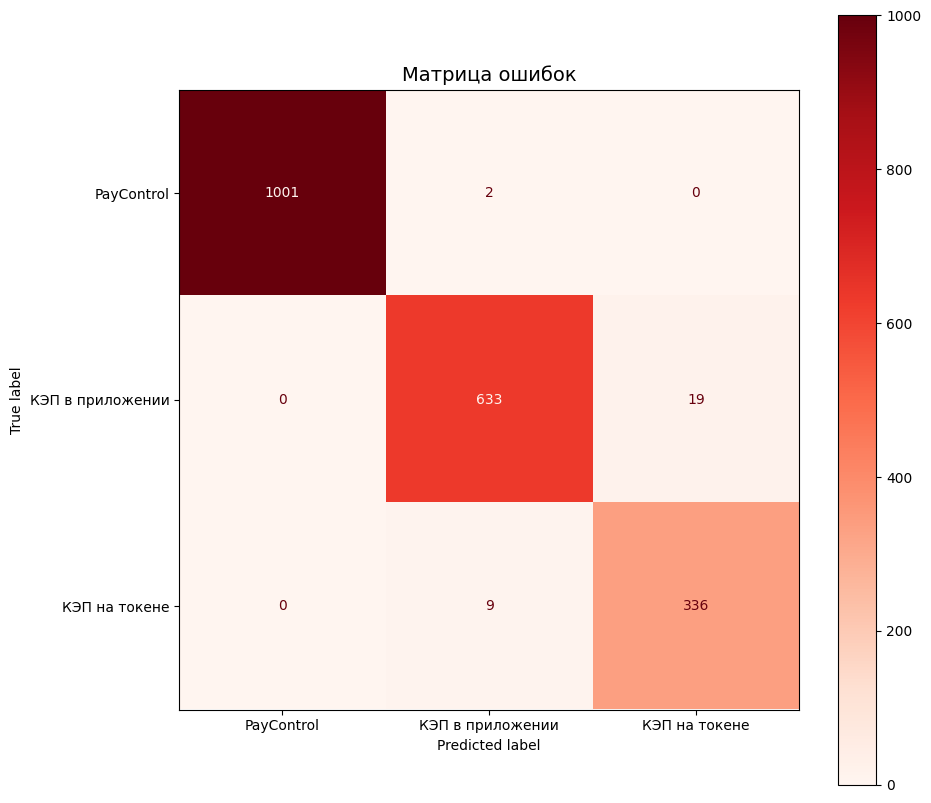

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['PayControl', 'КЭП в приложении', 'КЭП на токене']

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Reds, ax=ax)

ax.set_title('Матрица ошибок', fontsize=14)
plt.show()